# **IMPORT DATA PROCEDURE OF EMG SIGNAL**

**INPUT LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import scipy as sp
from scipy import signal
import math

**DATA PRE-PROCESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
column_names =['EMG']
data = pd.read_csv('/content/drive/MyDrive/TUGAS AKHIR DAFFA/HASIL/Data Percobaan/Data Percobaan Subjek : Zaki/EMG 3.txt',names=column_names)
data["sample interval"] = np.arange(np.size(data))
data["elapsed time"] = (data["sample interval"])*(1/2000)
x=data["elapsed time"]
y=data["EMG"]
data

,EMG,sample interval,elapsed time
0,1.649596,0,0.0000
1,1.586739,1,0.0005
2,1.693113,2,0.0010
3,1.597216,3,0.0015
4,1.690695,4,0.0020
...,...,...,...
18483,1.603662,18483,9.2415
18484,1.623809,18484,9.2420
18485,1.643955,18485,9.2425
18486,1.609303,18486,9.2430


**SAMPLING FREQUENCY**

In [ ]:
fs=int(round(1/(data.iloc[1,2]-data.iloc[0,2])))
fs

2000

**INPUT SIGNAL MORPHOLOGY**

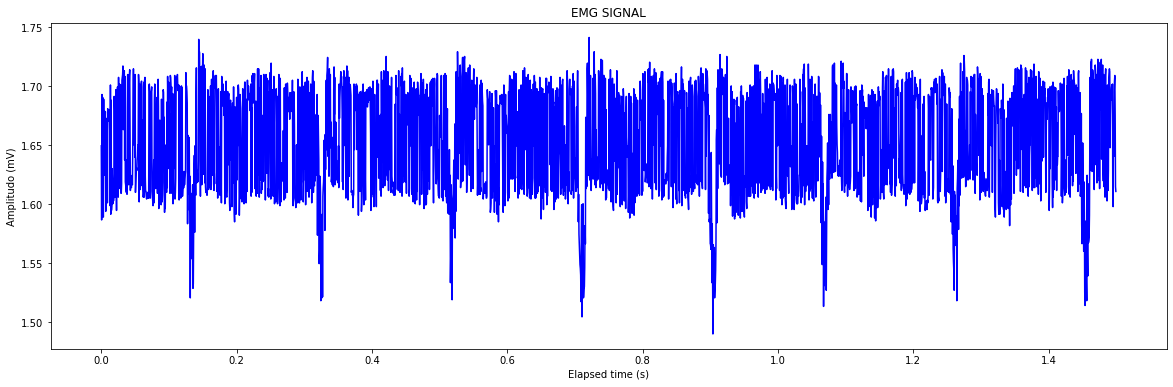

In [ ]:
fig = plot.figure()
plot.rcParams["figure.figsize"]=(25,5)
plot.plot(x[0:3000],y[0:3000],color='b')
plot.title('EMG SIGNAL')
plot.xlabel('Elapsed time (s)')
plot.ylabel('Amplitudo (mV)')
fig.set_size_inches(w=20,h=6)

# **PROCESSING PROCEDURE OF EMG SIGNAL**

**Removing Mean Procedure Of EMG Signal**

In [ ]:
sum = 0
for n in range (np.size(x)):
  sum+=y[n]
  mean = sum/np.size(x)
EMG_MEAN_CORRECTION=np.zeros(np.size(x))
for n in range (np.size(x)):
  EMG_MEAN_CORRECTION[n]=y[n]-mean

**EMG Signal Morphology After Removing Mean Procedure**

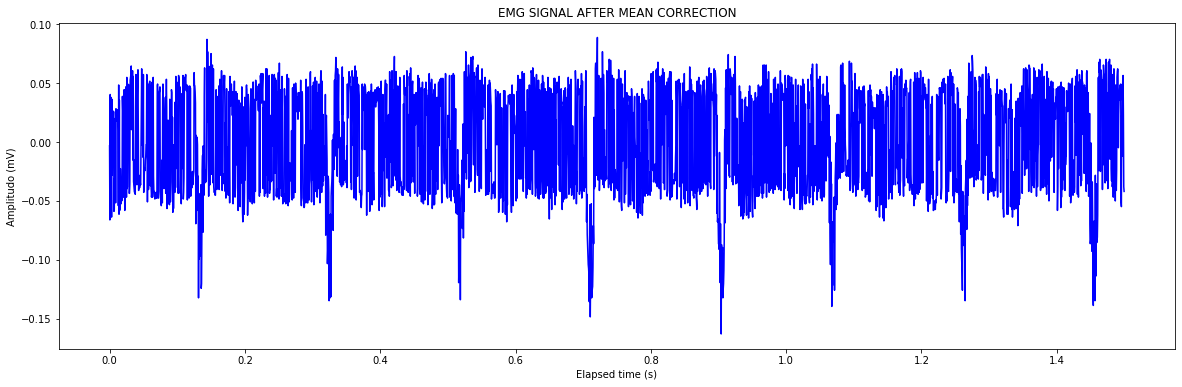

In [ ]:
fig = plot.figure()
plot.rcParams["figure.figsize"]=(25,5)
plot.plot(x[0:3000],EMG_MEAN_CORRECTION[0:3000],color='b')
plot.title('EMG SIGNAL AFTER MEAN CORRECTION')
plot.xlabel('Elapsed time (s)')
plot.ylabel('Amplitudo (mV)')
fig.set_size_inches(w=20,h=6)

**Lowpass Filter With Butterworth Filter Orde-2**

In [ ]:
fc_lpf=input("FREQUENCY CUT-OFF FOR LOWPASS FILTER :")
fc_lpf=float(fc_lpf)

FREQUENCY CUT-OFF FOR LOWPASS FILTER :500


In [ ]:
# PROTOCOL FOR DATA [-N]
lpf_emg = np.zeros(np.size(x))
for n in range (3):
  lpf_emg[-n] = lpf_emg[0]
  EMG_MEAN_CORRECTION[-n] =  EMG_MEAN_CORRECTION[0]

In [ ]:
# PARAMETER DECLARATION FOR LOWPASS FILTER PROCEDURE
T = 1/fs
w = 2*math.pi*fc_lpf
a0 = w**2
a1 = 2*(w**2)
b1 = ((8/(T**2))-(2*(w**2)))
c0 = ((4/(T**2))-((2*(math.sqrt(2))*w)/T)+(w**2))
c1 = ((4/(T**2))+((2*(math.sqrt(2))*w)/T)+(w**2))

# BUTTERWORTH LOWPASS FILTER EQUATION IMPLEMENTATION FOR LPF PROCEDURE
for n in range (np.size(x)):
  lpf_emg[n] = ((b1*lpf_emg[n-1])-(c0*lpf_emg[n-2])+(a0* EMG_MEAN_CORRECTION[n])+(a1* EMG_MEAN_CORRECTION[n-1])+(a0* EMG_MEAN_CORRECTION[n-2]))/c1
(lpf_emg)*2  

array([-0.00588381, -0.03596753, -0.05207525, ..., -0.06056759,
       -0.03219442, -0.00624121])

**EMG Signal Morpholgy After Lowpass Filter Procedure**

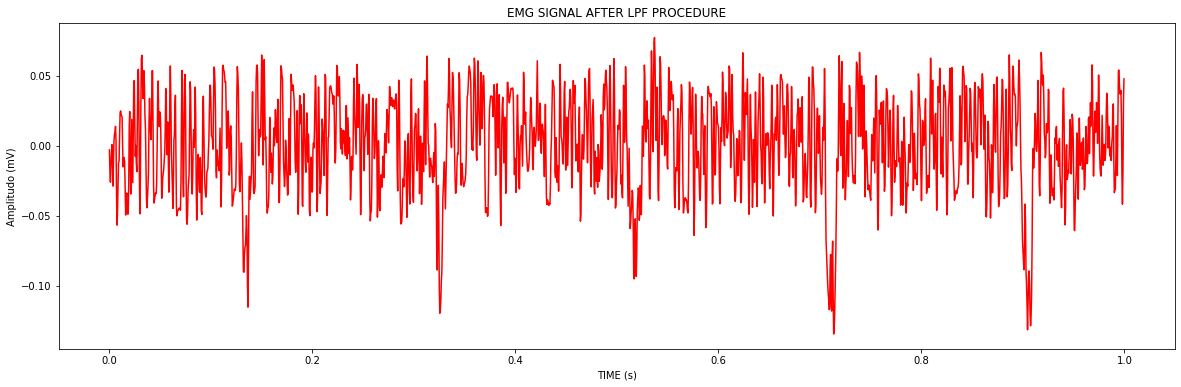

In [ ]:
fig = plot.figure()
plot.rcParams["figure.figsize"]=(25,5)
plot.plot(x[0:2000],lpf_emg[0:2000],color='r')
plot.title('EMG SIGNAL AFTER LPF PROCEDURE')
plot.xlabel('TIME (s)')
plot.ylabel('Amplitudo (mV)')
fig.set_size_inches(w=20,h=6)

**Highpass Filter With Butterworth Filter Orde-2**

In [ ]:
fc_hpf=input("FREQUENCY CUT-OFF FOR HIGHPASS FILTER :")
fc_hpf=float(fc_hpf)

FREQUENCY CUT-OFF FOR HIGHPASS FILTER :20


In [ ]:
hpf_emg = np.zeros(np.size(lpf_emg))
for n in range (np.size(lpf_emg)):
  hpf_emg[-n] = hpf_emg[0]

In [ ]:
# PARAMETER DECLARATION FOR HIGHPASS FILTER PROCEDURE
T = 1/fs
w = 2*math.pi*fc_hpf
e0 = 4*T
e1 = 8*T
e2 = 4*T
d0 = ((2*(w**2)*(T**2))-8)
d1 = (((w**2)*(T**2))-(2*(math.sqrt(2))*T*w)+4)
d2 = ((w**2)*(T**2))+(2*(math.sqrt(2))*T*w)+4

# BUTTERWORTH HIGHPASS FILTER EQUATION IMPLEMENTATION FOR HPF PROCEDURE
for n in range (np.size(lpf_emg)):
  hpf_emg[n] = ((e0*lpf_emg[n])-(e1*lpf_emg[n-1])+(e2*lpf_emg[n-2])-(d0*hpf_emg[n-1])-(d1*hpf_emg[n-2]))/d2
hpf_emg

array([-3.43054654e-06, -1.02109395e-05, -1.30342445e-05, ...,
       -1.97302204e-05, -1.12161163e-05, -3.96204142e-06])

**EMG Signal Morphology After Highpass Filter Procedure**

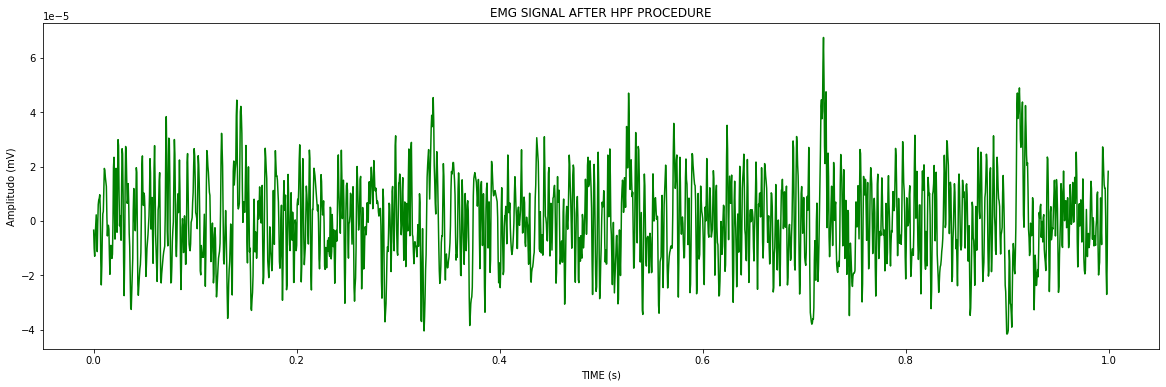

In [ ]:
fig = plot.figure()
plot.rcParams["figure.figsize"]=(25,5)
plot.plot(x[0:2000],hpf_emg[0:2000],color='green')
plot.title('EMG SIGNAL AFTER HPF PROCEDURE')
plot.xlabel('TIME (s)')
plot.ylabel('Amplitudo (mV)')
fig.set_size_inches(w=20,h=6)

# **EMG SIGNAL ANALYSIS PROCEDURE**

**Fast Fourier Transform (FFT) Procedure Of EMG Signal**

In [ ]:
D = np.fft.fft(hpf_emg)
D_mag = np.abs(D)/len(hpf_emg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


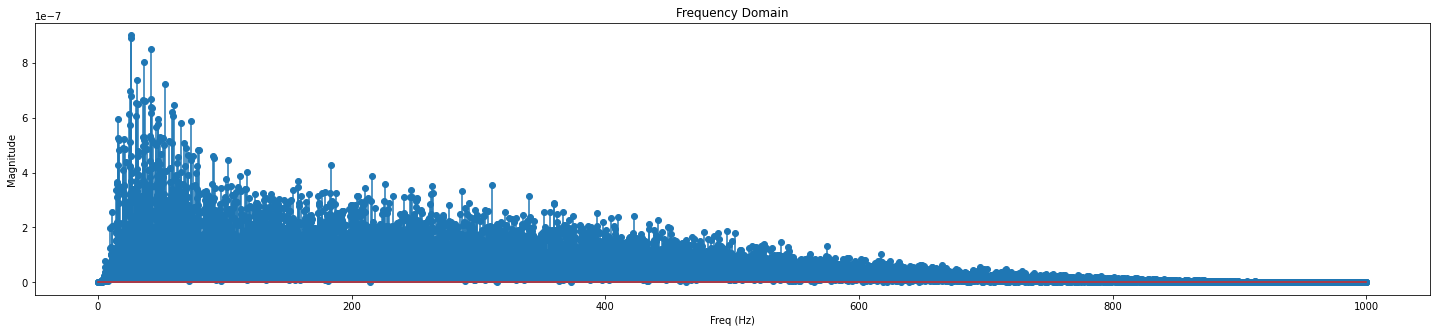

In [ ]:
for k in range (0,(np.size(hpf_emg))-1):
 k = np.arange(0,np.ceil(np.size(hpf_emg)/2),1,dtype=int)
fig = plot.figure()
plot.rcParams["figure.figsize"] = (25,5)
plot.stem(k*fs/(np.size(D_mag)), D_mag[k])
plot.xlabel("Freq (Hz)")
plot.ylabel("Magnitude")
plot.title("Frequency Domain")
plot.show()
fig.set_size_inches(w=20,h=6)

**Mean Power Frequency Calculation Of EMG Signal Procedure**

In [ ]:
sum1 = 0
sum2 = 0
for n in range (round(len(hpf_emg)/2)):
  sum1 += ((n*fs/len(hpf_emg))*D_mag[n])
  sum2 += (D_mag[n])
MPF = sum1/sum2
MPF

256.4738979402471